In [31]:
!python -V

Python 3.9.12


In [32]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [33]:
df = pd.read_csv('../Data/winequality-red.csv', sep=';')
df = pd.read_csv('../Data/winequality-white.csv', sep=';')

In [34]:
print("Shape of dataset:", df.shape)
print(df.head())

Shape of dataset: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5   

In [35]:
df['good_quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [36]:
print("Value counts for target:")
print(df['good_quality'].value_counts())

Value counts for target:
0    3838
1    1060
Name: good_quality, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['good_quality']
)

print("Train data:", len(df_train))
print("Validation data:", len(df_val))

Train data: 3918
Validation data: 980


In [38]:
numerical = df.columns.drop(['quality', 'good_quality']).tolist()
categorical = []

In [39]:
train_dicts = df_train[numerical].to_dict(orient='records')
val_dicts = df_val[numerical].to_dict(orient='records')

In [40]:
dv = DictVectorizer(sparse=False)

In [41]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [42]:
y_train = df_train['good_quality'].values
y_val = df_val['good_quality'].values

In [43]:
print("Feature matrix shape:", X_train.shape)

Feature matrix shape: (3918, 11)


In [44]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
y_pred_proba = lr.predict_proba(X_val)[:, 1]

acc = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_proba)

print("\nLogistic Regression Performance:")
print("Accuracy:", acc)
print("ROC AUC:", auc)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Logistic Regression Performance:
Accuracy: 0.8051020408163265
ROC AUC: 0.7623575078616353

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       768
           1       0.61      0.28      0.39       212

    accuracy                           0.81       980
   macro avg       0.72      0.62      0.64       980
weighted avg       0.78      0.81      0.78       980



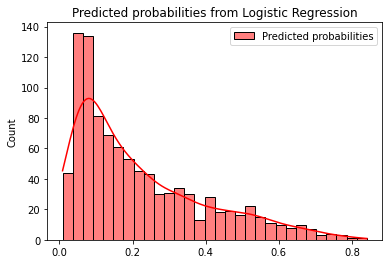

In [45]:
sns.histplot(y_pred_proba, bins=30, kde=True, color='red', label='Predicted probabilities')
plt.title("Predicted probabilities from Logistic Regression")
plt.legend()
plt.show()

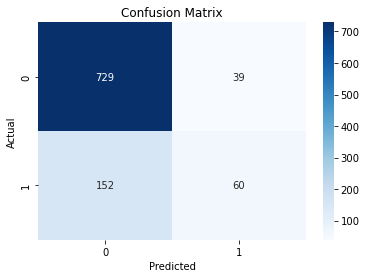

In [46]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
with open('../Model/log_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

print("Model saved to Model/log_reg.bin")

Model saved to Model/log_reg.bin


In [24]:
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_val)

acc_ridge = accuracy_score(y_val, y_pred_ridge)
print("\nRidge Classifier Accuracy:", acc_ridge)


Ridge Classifier Accuracy: 0.8040816326530612



Lasso RMSE: 0.39241787461614885


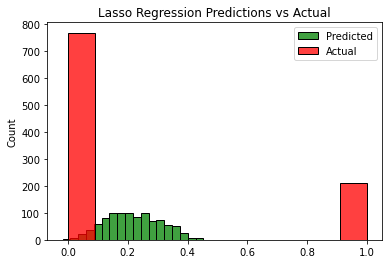

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_val)
rmse = mean_squared_error(y_val, y_pred_lasso, squared=False)

print("\nLasso RMSE:", rmse)

sns.histplot(y_pred_lasso, color='green', label='Predicted')
sns.histplot(y_val, color='red', label='Actual')
plt.legend()
plt.title("Lasso Regression Predictions vs Actual")
plt.show()